In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from hmmlearn import hmm
import numpy as np

In [2]:
N_regimes = 4

S =30, 5   # figure 사이즈, 디테일하게 보려면 이거 x축 늘리면 됨

In [3]:
kor = pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) #인덱스 불러오기
usa = pd.read_csv('Composite leading indicator.csv', index_col=0, parse_dates=True )
kororign = pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) 

stock = pd.read_csv('SPYstock.csv', index_col=0, parse_dates=True )
stockori = pd.read_csv('SPYstock.csv', index_col=0, parse_dates=True )

kor['value'] =( kor['value'] - kor['value'].mean() ) / kor['value'].std()

usa['value'] =( usa['value'] - usa['value'].mean() ) / usa['value'].std()


<AxesSubplot:title={'center':'USA Leading indicator'}, xlabel='time'>

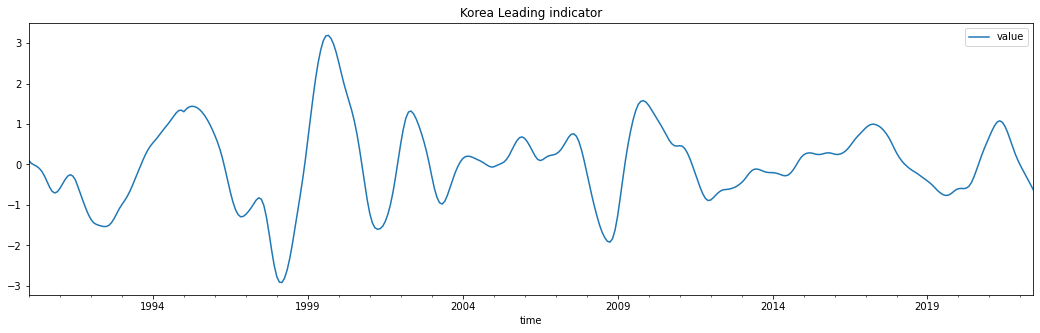

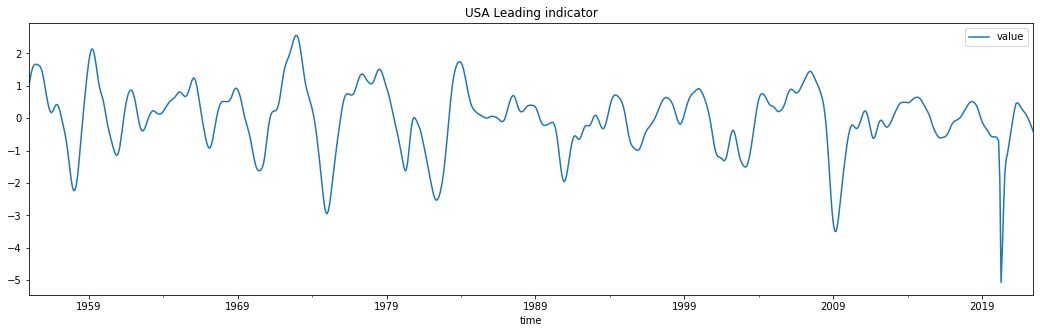

In [4]:
kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 

usa.plot(title='USA Leading indicator', figsize=(18, 5)) 

In [5]:
#Korea hmm부터

In [6]:
#for i in range(N_regimes):
#    plt.subplot(N_regimes, 1, i+1)                # nrows=2, ncols=1, 
#    kor_model_fit.smoothed_marginal_probabilities[i].plot(title='Korea Regime {}.'.format(i), figsize=(18, 18))
#    kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 

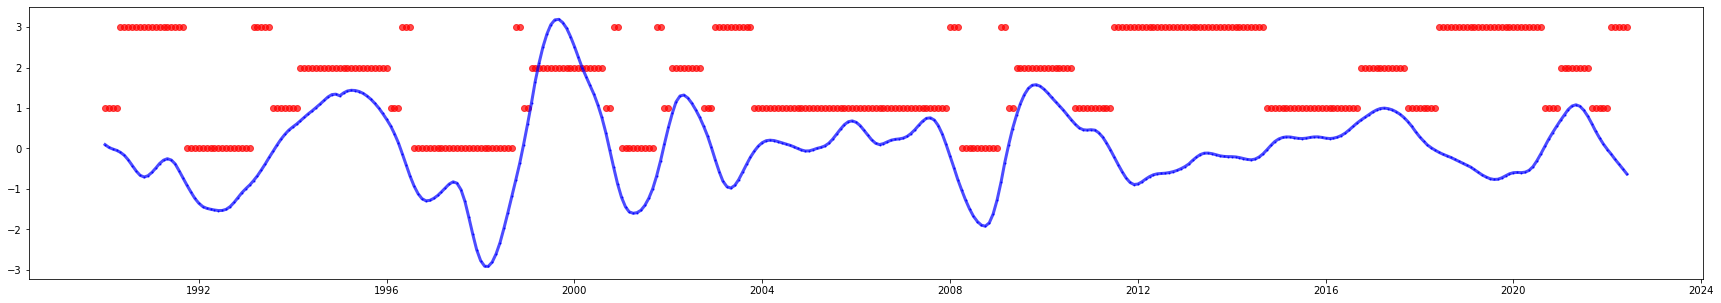

In [7]:
model2 = hmm.GaussianHMM(n_components=N_regimes, n_iter=1000).fit(kor.dropna())

indexdf = pd.DataFrame(kor.index)
preddftemp = pd.DataFrame([model2.decode(kor.dropna())[1]])

preddftemp=preddftemp.T
preddftempfin=pd.concat([preddftemp, indexdf], axis=1)
preddftempfin = preddftempfin.set_index('time')

plt.figure(figsize=(S))
plt.plot(kor.index, kor['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.7)
plt.scatter(kor.index, preddftempfin, alpha=0.7, linewidth=1, color='red')
plt.show()

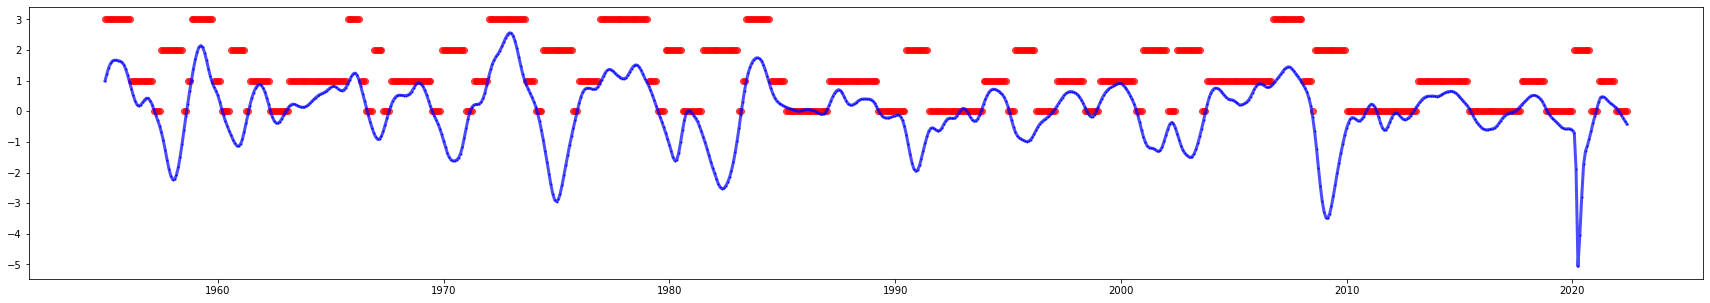

In [8]:
#usa hmm

model_usa = hmm.GaussianHMM(n_components=N_regimes, n_iter=1000).fit(usa.dropna())

indexdf_u = pd.DataFrame(usa.index)
preddftemp_u = pd.DataFrame([model_usa.decode(usa.dropna())[1]])

preddftemp_u=preddftemp_u.T
preddftempfin_u=pd.concat([preddftemp_u, indexdf_u], axis=1)
preddftempfin_u = preddftempfin_u.set_index('time')

plt.figure(figsize=(S))
plt.plot(usa.index, usa['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.7)
plt.scatter(usa.index, preddftempfin_u, alpha=0.7, linewidth=1, color='red')
plt.show()

In [9]:
#2국면 책칠코드 
'''
indexdf_o = pd.DataFrame(kororign.index)
preddftemp_o = pd.DataFrame([model_originstock.decode(kororign.dropna())[1]])

preddftemp_o=preddftemp_o.T
preddftempfin_o=pd.concat([preddftemp_o, indexdf], axis=1)
preddftempfin_o = preddftempfin_o.set_index('time')

for i in range(len(kor.index)):
    if preddftempfin_o.iloc[i, 0] == 1:
        kororign.iloc[i, 0] = np.nan
        
plt.figure(figsize=(18,5))
plt.plot(kor.index, copykororign['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.4)
plt.plot(kor.index, kororign['value'], '-s', color='r', markersize=3, linewidth=6, alpha=0.4)

plt.show()
'''

"\nindexdf_o = pd.DataFrame(kororign.index)\npreddftemp_o = pd.DataFrame([model_originstock.decode(kororign.dropna())[1]])\n\npreddftemp_o=preddftemp_o.T\npreddftempfin_o=pd.concat([preddftemp_o, indexdf], axis=1)\npreddftempfin_o = preddftempfin_o.set_index('time')\n\nfor i in range(len(kor.index)):\n    if preddftempfin_o.iloc[i, 0] == 1:\n        kororign.iloc[i, 0] = np.nan\n        \nplt.figure(figsize=(18,5))\nplt.plot(kor.index, copykororign['value'], '-s', color='blue', markersize=1, linewidth=3, alpha=0.4)\nplt.plot(kor.index, kororign['value'], '-s', color='r', markersize=3, linewidth=6, alpha=0.4)\n\nplt.show()\n"